## Lab 1 - Recommendation system smallest 

In [116]:
import pandas as pd 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import plotly_express as px
import seaborn as sns 
import matplotlib.pyplot as plt

In [117]:
movies="C:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/data/ml-latest-small/ml-latest-small/movies.csv"
ratings="C:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/data/ml-latest-small/ml-latest-small/ratings.csv"

df_movies_small=pd.read_csv(movies, usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"})
df_ratings_small=pd.read_csv(ratings, usecols=["userId", "movieId", "rating"], dtype={"userId": "int32", "movieId": "int32", "rating": "float32"})

In [118]:
df_movies_small.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [119]:
df_ratings_small.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [120]:
# spare matrix 
#        Users
#        [4,4,5]
# movies [4,3,2]
#        [3,1,3]

# think of it as database tabels, we can also pivot tables, using one tables index to use that as index on another table, to then get new info about the certain index in this 
# case movieId 

movies_users= df_ratings_small.pivot(index="movieId", columns="userId", values="rating").fillna(0)
mat_movies_users_small= csr_matrix(movies_users.values)
 
mat_movies_users_small

<9724x610 sparse matrix of type '<class 'numpy.float32'>'
	with 100836 stored elements in Compressed Sparse Row format>

In [121]:
# Eculidean distance 
# Manhattan distance
# Minkowski distance
# Cosine similarity  
model_KNN= NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=20)

In [122]:
model_KNN.fit(mat_movies_users_small)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [123]:
# Recommender(movie_name) => List of Movies recommended 

def recommender(movie_name, data, model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(movie_name, df_movies_small["title"])[2]
    print("Movies Selected: ", df_movies_small["title"][idx], "Index: ", idx)
    print("Searching for recommendations.....")
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(df_movies_small["title"][i].where(i!=idx))
        

recommender("lord of the rings", mat_movies_users_small, model_KNN, 20)

Movies Selected:  Lord of the Rings, The (1978) Index:  1577
Searching for recommendations.....
1577                                                  NaN
2374                                 War Zone, The (1999)
2283                                       Yojimbo (1961)
2314    Women on the Verge of a Nervous Breakdown (Muj...
1505                           Black Cauldron, The (1985)
4309                                         Holes (2003)
2378                              Bicentennial Man (1999)
2452                Hard-Boiled (Lat sau san taam) (1992)
3181    City of Women, The (Città delle donne, La) (1980)
1375                Fear and Loathing in Las Vegas (1998)
2648                                       Cabaret (1972)
972                                    Down by Law (1986)
1204                            Leave It to Beaver (1997)
2819            Missing in Action 2: The Beginning (1985)
2234    Man and a Woman, A (Un homme et une femme) (1966)
1718                              

---------

## 1.1 - Movielens full - EDA

In [124]:
# read files and specify cols 

movies = "C:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/data/ml-latest/movies.csv"
ratings = "C:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/data/ml-latest/ratings.csv"

df_movies = pd.read_csv(movies, usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"})
df_ratings= pd.read_csv(ratings, usecols=["userId", "movieId", "rating"], dtype={"userId": "int32", "movieId": "int32", "rating": "float32"})
df_movies


,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
86532,288967,State of Siege: Temple Attack (2021)
86533,288971,Ouija Japan (2021)
86534,288975,The Men Who Made the Movies: Howard Hawks (1973)
86535,288977,Skinford: Death Sentence (2023)


### EDA

1.1 B)

In [125]:
df_merged = pd.merge(df_ratings, df_movies, on="movieId", how="inner")

title_count = df_merged["title"].value_counts()

top_10_rated = title_count[:10].reset_index()
top_10_rated.columns = ['title', 'count']


fig = px.bar(top_10_rated, x="title", y="count", title="The most rated movies")
fig.show()
fig.write_html("1_1B_plot")

1.1 C)

In [126]:

mean_ratings = df_merged.groupby("title")["rating"].mean()

mean_ratings = pd.DataFrame(mean_ratings).reset_index()
mean_ratings_10 = mean_ratings[mean_ratings["title"].isin(top_10_rated["title"])]
fig = px.bar(mean_ratings_10, x="title", y="rating", title="Mean of rating points")
fig.show()
fig.write_html("1_1C_plot")

1.1 D) 

In [127]:
df_movies["year"] = df_movies["title"].apply(lambda x: x.split("(")[-1].split(")")[0])

df_movies["year"] = pd.to_numeric(df_movies["year"], errors="coerce")
df_movies.dropna(subset=["year"], inplace=True)

year_count = df_movies["year"].value_counts()

movies_per_year = year_count.reset_index()
movies_per_year.columns = ["year", "count"]

movies_per_year.sort_values(by="year", inplace=True)
fig = px.line(movies_per_year, x="year", y="count", title="movies made per year", line_shape="spline", )
fig.show()



1.1 E) 

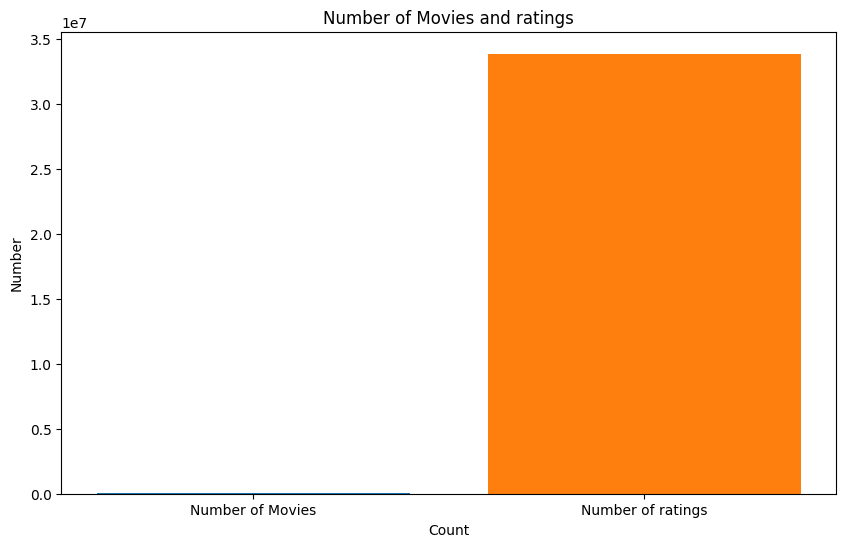

In [128]:
movie_count = len(df_movies["movieId"])
rating_count = len(df_ratings["rating"])
# using matplotlib just to try, i prefer using plotly_express
plt.figure(figsize=(10, 6))
plt.bar("Number of Movies", movie_count)
plt.bar("Number of ratings", rating_count)
plt.title('Number of Movies and ratings')
plt.xlabel('Count')
plt.ylabel('Number')
plt.show()



----- 

### Sort and drop data
- my thoughts are to drop year from the df_movies dataframe, as the years can be extracted from the title, the dataset will then be somewhat smaller and not lose any potential.
- another way to allocate memory more efficently i can specify the datatypes when creating the dataframes as we have done above.

- this is not enough though since the datasets are that large, my idea is to filter our most of the user, creating a sample of users with the most rating.
- altarnate approach is to sample users but also sample genres, for example create subsets of tables, 1 for action/sci-fi and 1 for drama/romance to then let the user choose what genre he or she want to get a recommended film

In [163]:
# get the users with the highest rating count to use in the pivot get a sample of 1000 users to use in the pivot, that way we get all movies and a great sample of users to base ratings on
user_rating_count = df_ratings.groupby("userId").size().reset_index(name="ratings_count")
top_user = user_rating_count.sort_values(by="ratings_count", ascending=False)[:1000]
df_ratings_1000 = df_ratings[df_ratings["userId"].isin(top_user["userId"])]

movie_users = df_ratings_1000.pivot(index="movieId", columns="userId", values="rating").fillna(0)

movie_users



userId,461,487,897,2270,2374,2402,3469,3517,3951,4127,...,327625,328859,328961,329487,329594,329845,329954,330196,330517,330535
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.5,4.5,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,3.5,4.5,5.0,4.5,3.0,0.0,2.5,2.0,3.0
2,4.5,2.0,3.0,0.0,0.0,3.5,2.5,2.0,0.0,0.0,...,0.0,2.5,3.0,5.0,3.0,5.0,3.5,3.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.5,0.0,2.0,2.0,3.0,1.5,0.0,0.0,...,0.0,1.5,0.0,3.0,2.5,1.5,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create csr_matrix to since there are alot of 0 values in our table

In [167]:
mat_movies_users_large= csr_matrix(movies_users.values)
mat_movies_users_large

<9724x610 sparse matrix of type '<class 'numpy.float32'>'
	with 100836 stored elements in Compressed Sparse Row format>

### LineProfiler
- Using line_profiler from LineProfiler() to visualize the lines of code that takes up the most time.
- 1 fault is that this runs faster since i have run this several times in this enviorment. This creates caching and memory opimization for me in this session but the % of the time should be correct, this is being proven even if i restart the kernel and clear the memory.

In [165]:
# from line_profiler import LineProfiler
# def execution_time():
#     df_movies=pd.read_csv(movies, usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"})
#     df_ratings=pd.read_csv(ratings, usecols=["userId", "movieId", "rating"], dtype={"userId": "int32", "movieId": "int32", "rating": "float32"})
#     movies_users= df_ratings.pivot(index="movieId", columns="userId", values="rating").fillna(0)
#     mat_movies_users= csr_matrix(movies_users.values)
#     mat_movies_users
#     pass

# profiler = LineProfiler()
# profiler.add_function(execution_time)
# profiler.run("execution_time()")

# profiler.print_stats()
    

In [166]:
"""model_KNN= NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=5)

def recommender(movie_name, data, model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(movie_name, df_movies["title"])[2]
    print("Movies Selected: ", df_movies["title"][idx], "Index:", idx)
    print("Searching for recommendations.....")
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    print(idx)
    for i in indices[0]:
        if i != idx:
            print(df_movies["title"][i])
        
        
recommender("lord of the rings", mat_movies_users, model_KNN, 6)
"""

'model_KNN= NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=5)\n\ndef recommender(movie_name, data, model, n_recommendations ):\n    model.fit(data)\n    idx=process.extractOne(movie_name, df_movies["title"])[2]\n    print("Movies Selected: ", df_movies["title"][idx], "Index:", idx)\n    print("Searching for recommendations.....")\n    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)\n    print(idx)\n    for i in indices[0]:\n        if i != idx:\n            print(df_movies["title"][i])\n        \n        \nrecommender("lord of the rings", mat_movies_users, model_KNN, 6)\n'

In [168]:
model_KNN = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=5)

def recommender(movie_name, data, model, n_recommendations):
    model.fit(data)
    idx = process.extractOne(movie_name, df_movies["title"])[2]
    print("Movies Selected: ", df_movies["title"][idx], "Index:", idx)
    print("Data Shape:", data.shape)
    print("Searching for recommendations.....")
    
    if idx >= data.shape[0]:
        print("Error: Index out of bounds")
        return
    
    distances, indices = model.kneighbors(data[idx], n_neighbors=n_recommendations)
    print("Nearest Neighbors Indices:", indices)
    
    for i in indices[0]:
        if i != idx:
            print(df_movies["title"][i])

# Call the recommender function
recommender("lord of the rings", mat_movies_users_large, model_KNN, 6)

Movies Selected:  Lord of the Rings, The (1978) Index: 2026
Data Shape: (9724, 610)
Searching for recommendations.....
Nearest Neighbors Indices: [[2026 2687 1487 1904 1845 2246]]
Heaven Can Wait (1978)
Brassed Off (1996)
Child's Play 3 (1991)
You Can't Take It with You (1938)
Velvet Goldmine (1998)
